<a href="https://colab.research.google.com/github/GabeMaldonado/-GabeMaldonado.github.io/blob/master/ShallowNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [0]:
# Loading the mnist data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Examining Training Data

In [0]:
X_train.shape

(60000, 28, 28)

That's 60,000 images that are 28x28

In [0]:
y_train.shape

(60000,)

This indicates the 60,000 labels.

In [0]:
y_train[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

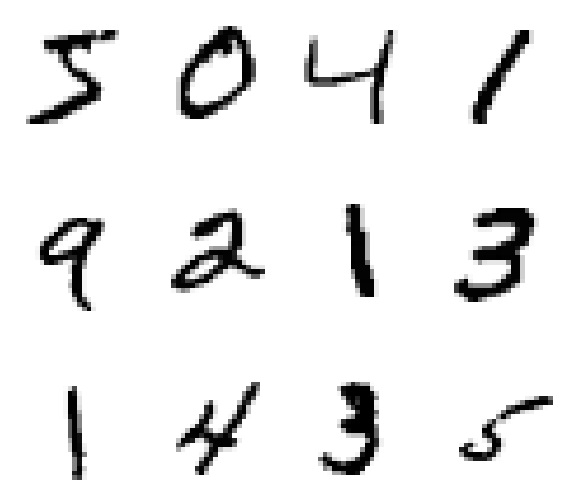

In [0]:
# show the first 12 digits in the data set
plt.figure(figsize=(8,8))
for k in range(12):
  plt.subplot(3, 4, k+1)
  plt.imshow(X_train[k], cmap='Greys')
  plt.axis('off')
plt.tight_layout()
plt.show()

## Examining Validation Data

In [0]:
X_valid.shape

(10000, 28, 28)

In [0]:
y_valid.shape

(10000,)

In [0]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

The cell above displays the matrix of integers that make up an image/digit. Each value represents a pixel which darkness can vary from 0 (white) to 255 (black).

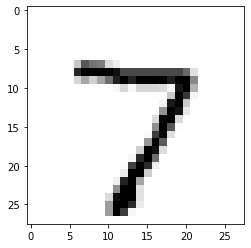

In [0]:
plt.imshow(X_valid[0], cmap='Greys')

In [0]:
y_valid[0]

7

## Preprocess Data

In this step, the shape data will get re-arranged from 28x28 to a flat 784-element array so it can match up the shapes of the input and output layers of the network. 

In [0]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

Here we also normalize the data by dividing them by 255 so that the values can range from 0 to 1. 

In [0]:
# convert pixel integers to floats --
X_train /= 255
X_valid /= 255

In [0]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
y_valid[0]

7

## Converting integer labels to one-hot-encodings. 

We have 10 posible labels for all the digits so we set the number of classes = 10. We will also use keras `.to_categorical` function to convert the training and validation labels to a one-hot-encoding format. We will print the label at index[0] again to see how it has changed.

In [0]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [0]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Designing the Neural Network Architecture

There are many ways to design the architecture of the NN. We'll design a very simple architecture for this example.

In [0]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Print the summary of the neetwork architecture.

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Configure model

In [0]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

Train Model

In [0]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))




Train on 60000 samples, validate on 10000 samples
Epoch 1/200





60000/60000 [==============================] - 2s 30us/step - loss: 0.0965 - acc: 0.1082 - val_loss: 0.0939 - val_acc: 0.1241
Epoch 2/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0927 - acc: 0.1413 - val_loss: 0.0918 - val_acc: 0.1615
Epoch 3/200
60000/60000 [==============================] - 1s 21us/step - loss: 0.0912 - acc: 0.1791 - val_loss: 0.0908 - val_acc: 0.1976
Epoch 4/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0903 - acc: 0.2026 - val_loss: 0.0900 - val_acc: 0.2084
Epoch 5/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0897 - acc: 0.2113 - val_loss: 0.0895 - val_acc: 0.2146
Epoch 6/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0893 - acc: 0.2170 - val_loss: 0.0891 - val_acc: 0.2205
Epoch 7/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0889 - acc: 0.2265 - val_loss: 0

In [0]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 24us/step


[0.0280658526301384, 0.8612]